# Top 5000 Youtube channels data from Socialblade
This dataset is from [Kaggle](https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade).  
I would like to use it to practice `pandas` and `sklearn` packages in python.  
Hope you can also get any idea from this notebook!  

## Install the necessary packages
`locale` is used to change chinese font family "Noto Sans CJK TC"
  
The dataset contains some null string "-- " and "--", so I changed them into '0'

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import locale
import numpy as np
mpl.rc("font", family = "Noto Sans CJK TC")
locale.setlocale(locale.LC_NUMERIC,'')
data = pd.read_csv("https://storage.googleapis.com/kaggle-datasets/51037/95293/data.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1554312537&Signature=ccknnRVKIFOiMJLhYk6VCsCYoPDwF3p9vwcPzyMyK0%2FfSTZtRl219OZU8DJ7IHvl6mUagDGAo35ZHChphMh6qxcmOhGqmGRH4CJzl%2Ft%2BH1Cy5Rgby4l%2BlHwcoYfkF%2Blub1CFMnU3Zwe6Jhbxq1jdO8AeGXVWrByW2v8%2BXP8g2lqLjTXegdGQbYRmE4heQ6IrPDwsuiUwoshXKwdk9JiDKD8PIzK3hK7d8D3xVWs9YgzzPZqj8tO%2Fc5%2BXP0w%2BpwSW1sX3QTDCpleYoVjFHGyOTj69ZYceGoPpESiIqZmK%2FMao6ccilen51yuPA4o2dgwrDN5FXfQBiCYyH%2BasvEDBdA%3D%3D")
Uploads = data["Video Uploads"]
Subscribers = data["Subscribers"]
Views = data["Video views"]
Subscribers[Subscribers =='-- '] = '0'
Uploads[Uploads == '--'] = '0'

C:\Users\KC\Miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\KC\Miniconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


## Check the head of dataset

In [2]:
data.head()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433


# Change strings in DataFrame to numeric array 

In [3]:
Uploads_arr = Uploads.apply(locale.atoi).values
Subscribers_arr = Subscribers.apply(locale.atoi).values
Views_arr = Views.values

# Data visualization

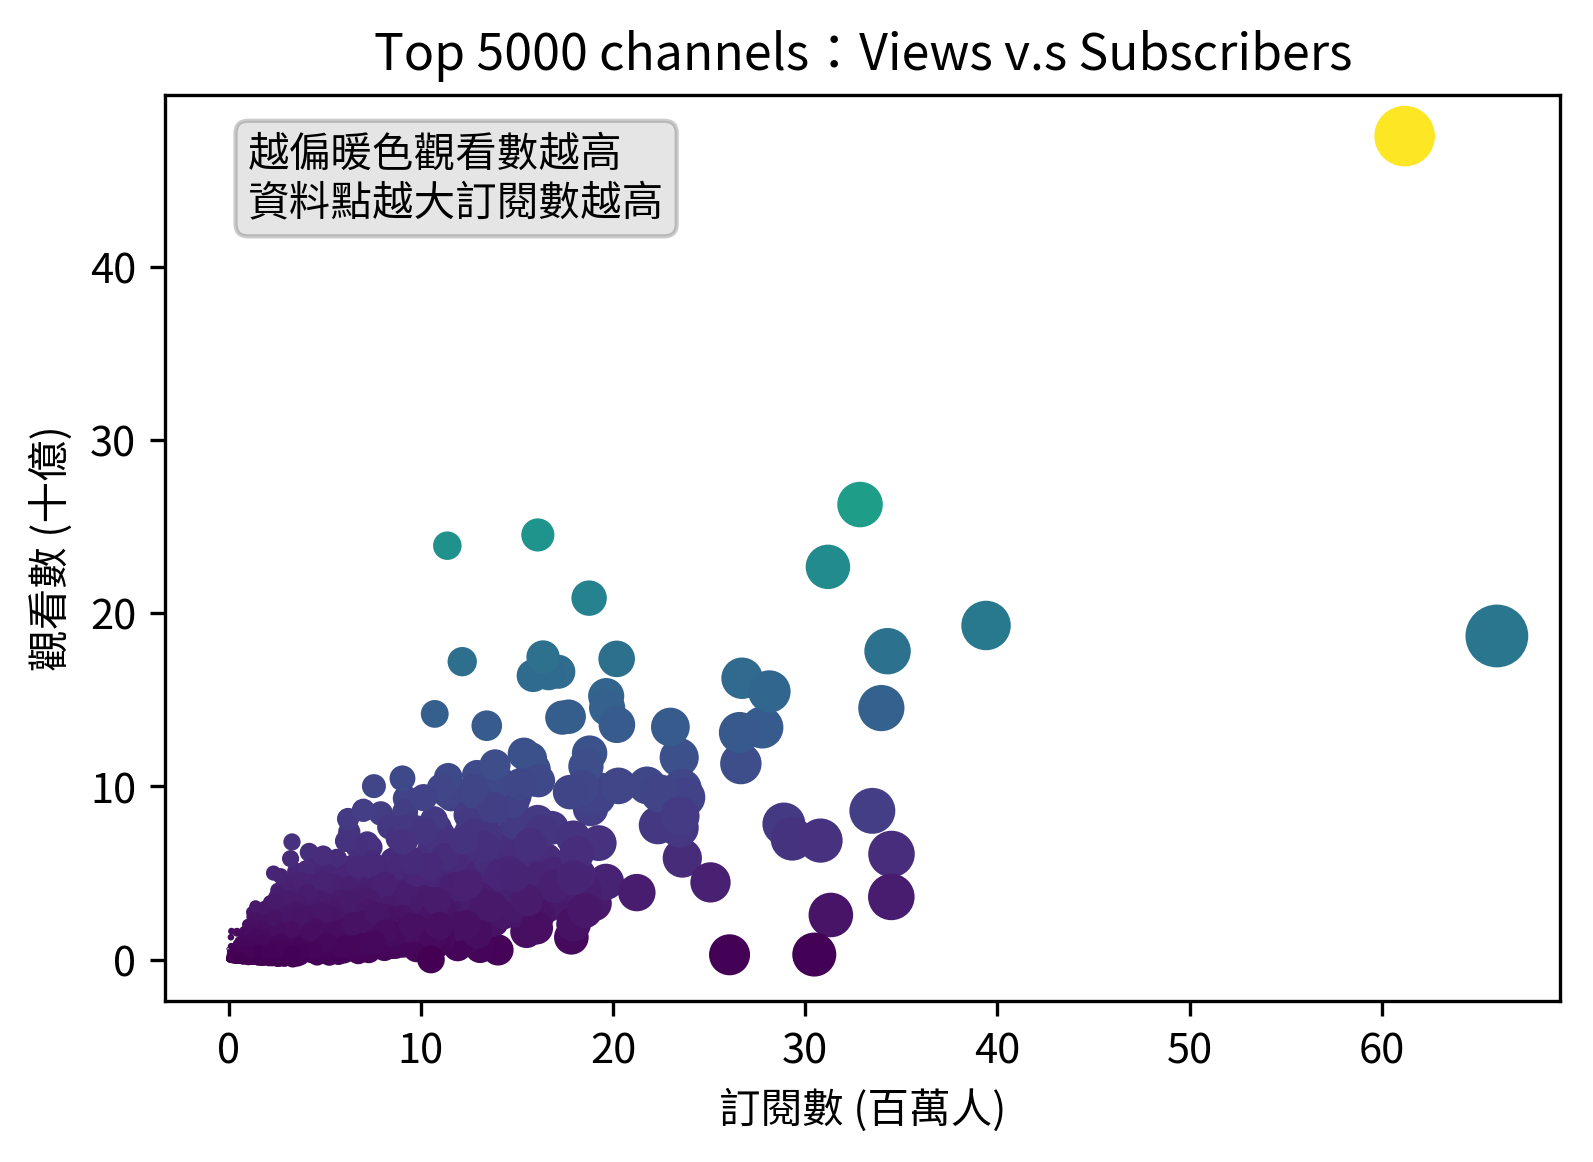

In [45]:
plt.figure(dpi=300)
ax = plt.subplot(111)
plt.xlabel("訂閱數 (百萬人)")
plt.ylabel("觀看數 (十億)")
plt.title("Top 5000 channels：Views v.s Subscribers")
plt.text(1,43,"越偏暖色觀看數越高\n資料點越大訂閱數越高",bbox=dict(boxstyle='round', facecolor='gray', alpha=0.2))
z = Views_arr / Views_arr.max()
s_vol = Subscribers_arr/1e6 *3
plt.scatter(Subscribers_arr/1e6, Views_arr/1e9, s=s_vol, c=z);

## Using `sklearn` to do linear regression

In [6]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

## Plot the line after linear regression

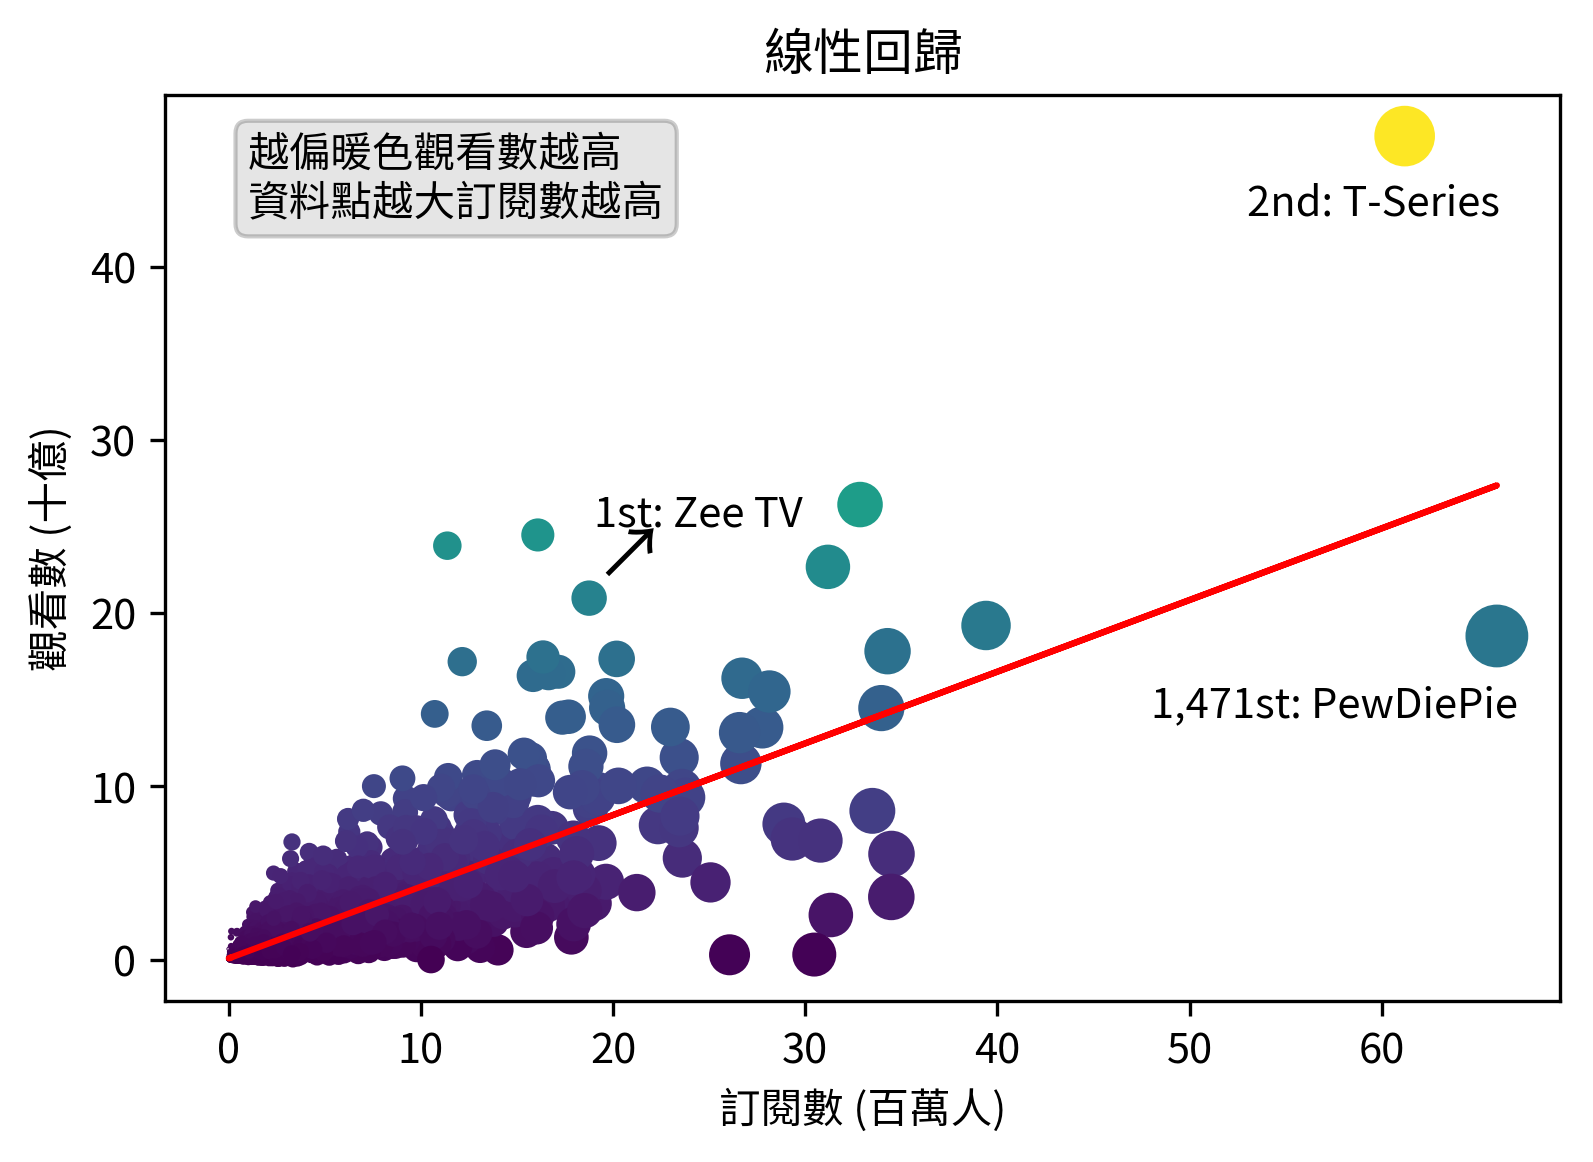

In [46]:
x = Subscribers_arr
X=Subscribers_arr.reshape(5000,1)
y = Views_arr.reshape(5000,1)
regr.fit(X, y)
Y = regr.predict(X)
plt.figure(dpi=300)
plt.xlabel("訂閱數 (百萬人)")
plt.ylabel("觀看數 (十億)")
plt.title("線性回歸")
plt.text(48,14, "1,471st: PewDiePie")
plt.text(53,43, "2nd: T-Series")
plt.text(19,22, "↗", fontsize=17)
plt.text(19,25, "1st: Zee TV")
plt.text(1,43,"越偏暖色觀看數越高\n資料點越大訂閱數越高",bbox=dict(boxstyle='round', facecolor='gray', alpha=0.2))
z = Views_arr / Views_arr.max()
s_vol = Subscribers_arr/1e6 *3
plt.scatter(x/1E6, y/1E9, s=s_vol, c=z)
plt.plot(x/1E6, Y/1E9, 'r', linewidth=1.5 );


## There are several special points in ranking or figure

In [208]:
data[(Subscribers_arr > 60e6) & (Views_arr < 30e9)]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1470,"1,471st",A-,PewDiePie,3601,65995310,18684630003


In [209]:
data[(Subscribers_arr > 60e6) & (Views_arr > 30e9)]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1,2nd,A++,T-Series,12661,61196302,47548839843


In [47]:
data[0:1]

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591


## Let's try to extract 60% of data to train
The rest 40% are testing.

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 1227)

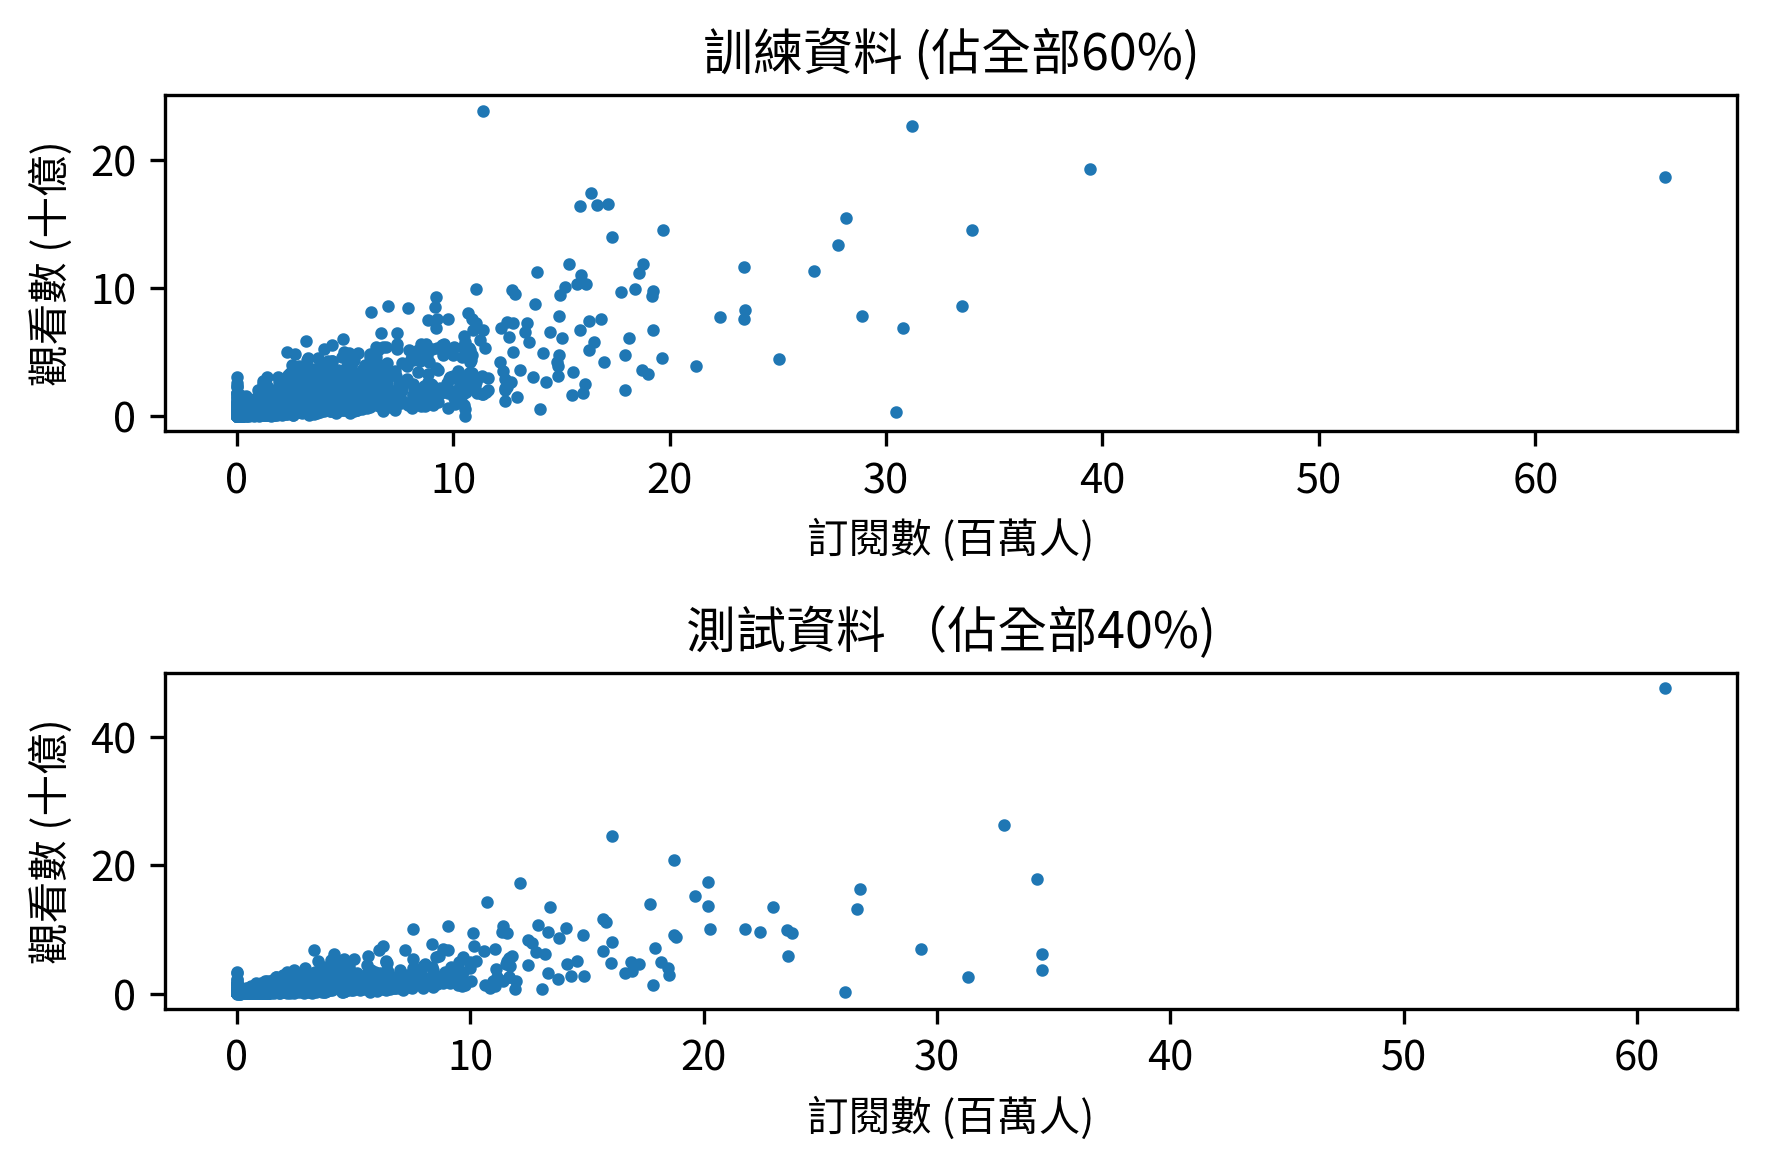

In [89]:
plt.figure(dpi=300)
plt.subplot(2,1,1)
plt.title("訓練資料 (佔全部60%)")
plt.xlabel("訂閱數 (百萬人)")
plt.ylabel("觀看數 (十億)")
plt.scatter(x_train/1e6, y_train/1e9, s=4);
plt.subplot(2,1,2)
plt.title("測試資料 （佔全部40%)")
plt.xlabel("訂閱數 (百萬人)")
plt.ylabel("觀看數 (十億)")
plt.scatter(x_test/1e6, y_test/1e9, s=4);
plt.tight_layout()

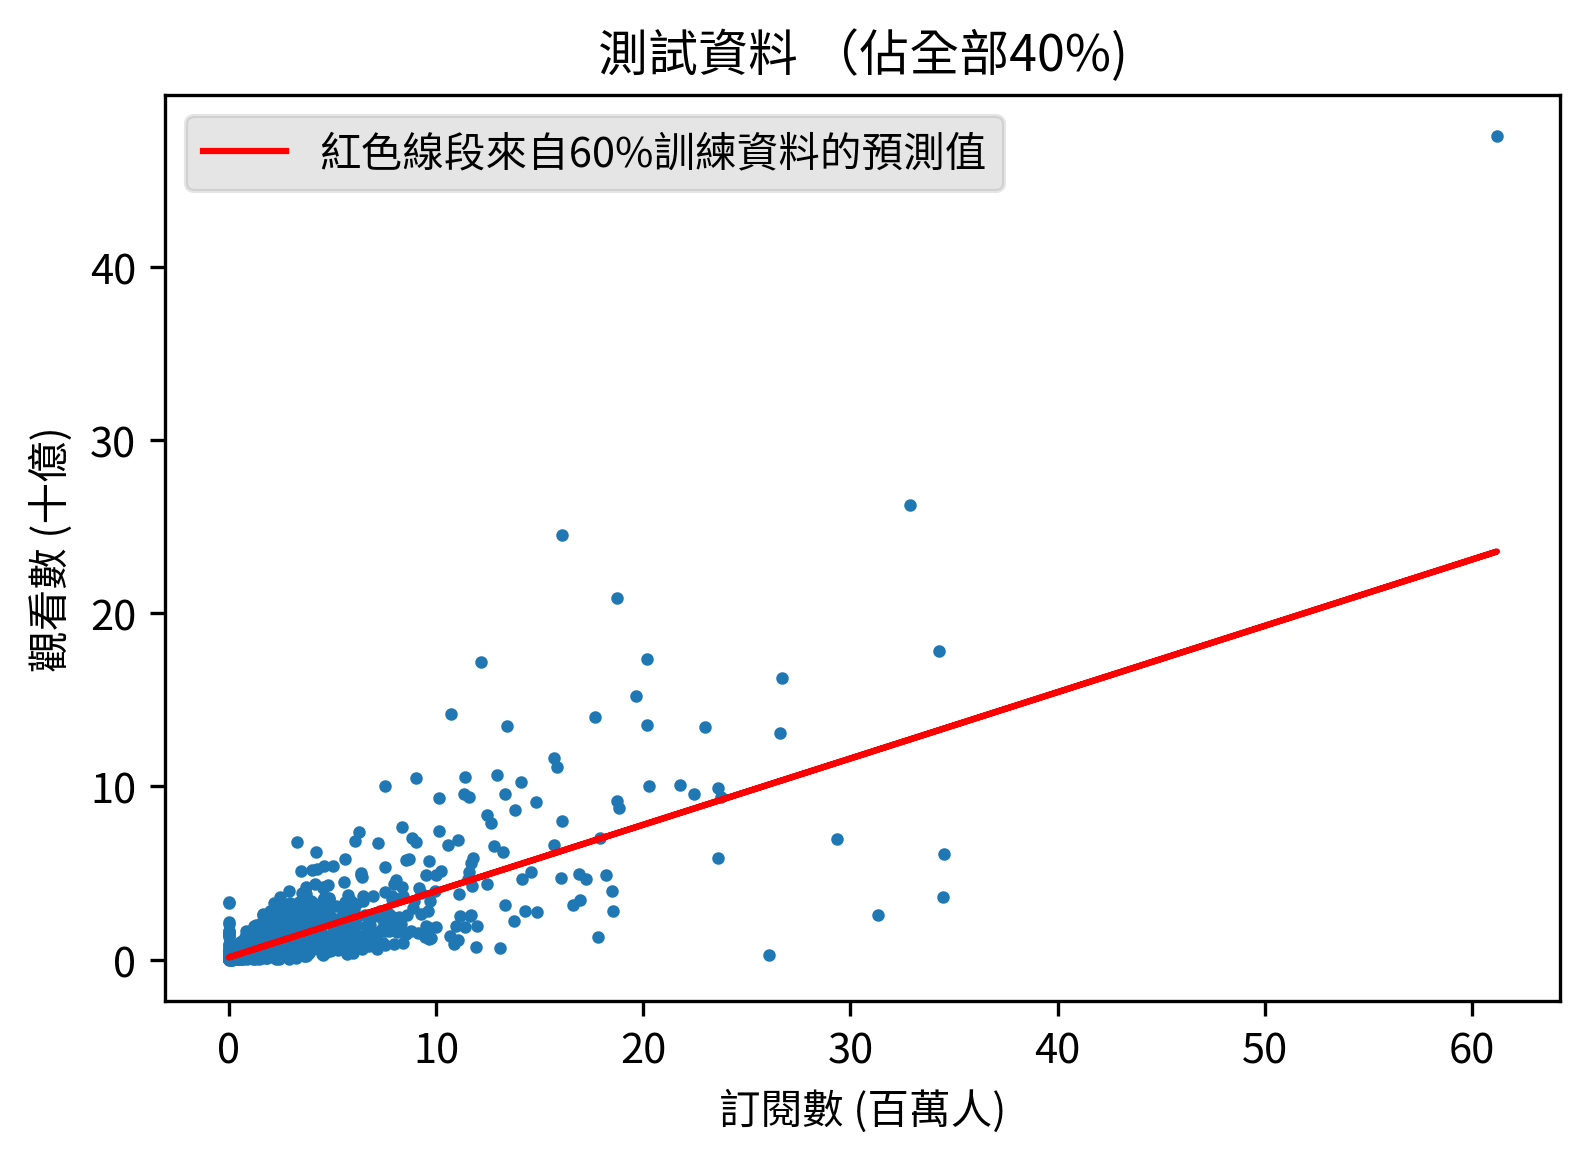

In [99]:
plt.figure(dpi=300)
regr_train = LinearRegression()
regr_train.fit(x_train, y_train)
Y_pred = regr_train.predict(x_test)
plt.scatter(x_test/1e6, y_test/1e9, s=4)
plt.title("測試資料 （佔全部40%)")
plt.xlabel("訂閱數 (百萬人)")
plt.ylabel("觀看數 (十億)")
plt.plot(x_test/1e6, Y_pred/1e9, 'r', label="紅色線段來自60%訓練資料的預測值")
plt.legend(facecolor='gray', framealpha=0.2,edgecolor='gray')

## Summary
It can be seen that the relationship between subscibers and video views is not linear.  
That's reasonable for different types of channels:
- channels of news media
    - high upload amounts (for every news)
    - high subscribers
    - low views per video
- channels of personal youtubers
    - varying upload amounts
    - varying subscribers depending on youtubers
    - relative high view per video
      
Therefore, it is more comparable with the same type channels.